In [140]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [141]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [142]:
NUM_CLASSES = 2

# Dataset reading

In [143]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21*2 + 21*2 + 2*1) + 1)))

In [144]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [146]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21*2 + 21*2 + 2*1, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [147]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input((21*2 + 21*2 + 2*1, )),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(200, activation='relu'),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(76, activation='relu'),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(10, activation='relu'),
#     tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
# ])

In [148]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_18 (Dropout)        (None, 86)                0         
                                                                 
 dense_24 (Dense)            (None, 20)                1740      
                                                                 
 dropout_19 (Dropout)        (None, 20)                0         
                                                                 
 dense_25 (Dense)            (None, 10)                210       
                                                                 
 dense_26 (Dense)            (None, 2)                 22        
                                                                 
Total params: 1972 (7.70 KB)
Trainable params: 1972 (7.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [149]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [150]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [151]:
model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/100
1/2 [==============>...............] - ETA: 0s - loss: 0.7748 - accuracy: 0.5312
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 1s 273ms/step - loss: 0.7901 - accuracy: 0.5069 - val_loss: 0.6753 - val_accuracy: 0.5306
Epoch 2/100
1/2 [==============>...............] - ETA: 0s - loss: 0.7621 - accuracy: 0.5391
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 75ms/step - loss: 0.7630 - accuracy: 0.5278 - val_loss: 0.6696 - val_accuracy: 0.9796
Epoch 3/100
1/2 [==============>...............] - ETA: 0s - loss: 0.7140 - accuracy: 0.5234
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5


C:\Users\Sanjay\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 75ms/step - loss: 0.7078 - accuracy: 0.5417 - val_loss: 0.6648 - val_accuracy: 0.4898
Epoch 4/100
1/2 [==============>...............] - ETA: 0s - loss: 0.7381 - accuracy: 0.5547
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 74ms/step - loss: 0.7407 - accuracy: 0.5278 - val_loss: 0.6715 - val_accuracy: 0.4694
Epoch 5/100
1/2 [==============>...............] - ETA: 0s - loss: 0.7018 - accuracy: 0.6328
Epoch 5: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 64ms/step - loss: 0.6930 - accuracy: 0.6319 - val_loss: 0.6757 - val_accuracy: 0.4694
Epoch 6/100
1/2 [==============>...............] - ETA: 0s - loss: 0.6945 - accuracy: 0.5312
Epoch 6: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 75ms/step - loss: 0.6925 - accuracy: 0.5347 - val_loss: 0.6739 - va

1/2 [==============>...............] - ETA: 0s - loss: 0.5836 - accuracy: 0.7812
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 56ms/step - loss: 0.5921 - accuracy: 0.7639 - val_loss: 0.5707 - val_accuracy: 0.9388
Epoch 32/100
1/2 [==============>...............] - ETA: 0s - loss: 0.5999 - accuracy: 0.7891
Epoch 32: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 62ms/step - loss: 0.6021 - accuracy: 0.7778 - val_loss: 0.5601 - val_accuracy: 0.8980
Epoch 33/100
1/2 [==============>...............] - ETA: 0s - loss: 0.5742 - accuracy: 0.7734
Epoch 33: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 68ms/step - loss: 0.5764 - accuracy: 0.7639 - val_loss: 0.5484 - val_accuracy: 0.9184
Epoch 34/100
1/2 [==============>...............] - ETA: 0s - loss: 0.5659 - accuracy: 0.7500
Epoch 34: saving model

2/2 [==============================] - 0s 67ms/step - loss: 0.4456 - accuracy: 0.8264 - val_loss: 0.2705 - val_accuracy: 1.0000
Epoch 59/100
1/2 [==============>...............] - ETA: 0s - loss: 0.3738 - accuracy: 0.8906
Epoch 59: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 63ms/step - loss: 0.3647 - accuracy: 0.8889 - val_loss: 0.2646 - val_accuracy: 1.0000
Epoch 60/100
1/2 [==============>...............] - ETA: 0s - loss: 0.4473 - accuracy: 0.8594
Epoch 60: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 57ms/step - loss: 0.4446 - accuracy: 0.8542 - val_loss: 0.2592 - val_accuracy: 1.0000
Epoch 61/100
1/2 [==============>...............] - ETA: 0s - loss: 0.3780 - accuracy: 0.8438
Epoch 61: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 61ms/step - loss: 0.3814 - accuracy: 0.8403 - val_loss: 0.253

Epoch 86/100
1/2 [==============>...............] - ETA: 0s - loss: 0.2454 - accuracy: 0.9062
Epoch 86: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 96ms/step - loss: 0.2458 - accuracy: 0.9097 - val_loss: 0.0934 - val_accuracy: 1.0000
Epoch 87/100
1/2 [==============>...............] - ETA: 0s - loss: 0.2452 - accuracy: 0.9297
Epoch 87: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 90ms/step - loss: 0.2387 - accuracy: 0.9306 - val_loss: 0.0890 - val_accuracy: 1.0000
Epoch 88/100
1/2 [==============>...............] - ETA: 0s - loss: 0.2529 - accuracy: 0.9219
Epoch 88: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 85ms/step - loss: 0.2681 - accuracy: 0.9028 - val_loss: 0.0872 - val_accuracy: 1.0000
Epoch 89/100
1/2 [==============>...............] - ETA: 0s - loss: 0.2033 - accuracy: 0.9375
Epoch 89:

In [152]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

1/1 [==============================] - 0s 27ms/step - loss: 0.0535 - accuracy: 1.0000


In [153]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [154]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 110ms/step
[0.97164404 0.02835593]
0


# Confusion matrix

2/2 [==============================] - 0s 0s/step


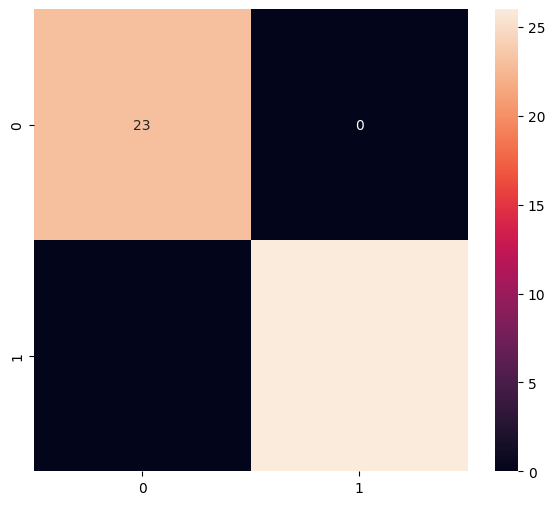

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        26

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49



In [155]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [156]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

C:\Users\Sanjay\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [157]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Sanjay\AppData\Local\Temp\tmp_gue_uyw\assets


INFO:tensorflow:Assets written to: C:\Users\Sanjay\AppData\Local\Temp\tmp_gue_uyw\assets


4984

# Inference test

In [158]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [159]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [160]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [161]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [162]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.97171766 0.02828237]
0
